In [6]:
import csv
import requests
import os
import pandas as pd

url = 'https://nyc3.digitaloceanspaces.com/owid-public/data/energy/owid-energy-data.csv'
response = requests.get(url)
path = '/Users/patrickgundlach/Library/CloudStorage/OneDrive-Persönlich/Nova/2 Semester/Advanced Programming/Git/group_12/Prototypes'
with open(os.path.join(path,'downloaded_data.csv'), 'w') as f:
    writer = csv.writer(f)
    for line in response.iter_lines():
        writer.writerow(line.decode('utf-8').split(','))

filename='downloaded_data.csv'
df = pd.read_csv(filename) 
display(df.head())

iso_code      country  year  coal_prod_change_pct  coal_prod_change_twh  \
0      AFG  Afghanistan  1900                   NaN                   NaN   
1      AFG  Afghanistan  1901                   NaN                   0.0   
2      AFG  Afghanistan  1902                   NaN                   0.0   
3      AFG  Afghanistan  1903                   NaN                   0.0   
4      AFG  Afghanistan  1904                   NaN                   0.0   

   gas_prod_change_pct  gas_prod_change_twh  oil_prod_change_pct  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN                  NaN                  NaN   

   oil_prod_change_twh  energy_cons_change_pct  ...  solar_elec_per_capita  \
0                  NaN                     NaN  ...                    NaN   
1                  NaN                     NaN  ...                    NaN   
2                  NaN                     NaN  ...                    NaN   
3                  NaN                     NaN  ...                    NaN   
4                  NaN                     NaN  ...                    NaN   

   solar_energy_per_capita  gdp  wind_share_elec  wind_cons_change_pct  \
0                      NaN  NaN              NaN                   NaN   
1                      NaN  NaN              NaN                   NaN   
2                      NaN  NaN              NaN                   NaN   
3                      NaN  NaN              NaN                   NaN   
4                      NaN  NaN              NaN                   NaN   

   wind_share_energy  wind_cons_change_twh  wind_consumption  \
0                NaN                   NaN               NaN   
1                NaN                   NaN               NaN   
2                NaN                   NaN               NaN   
3                NaN                   NaN               NaN   
4                NaN                   NaN               NaN   

   wind_elec_per_capita  wind_energy_per_capita  
0                   NaN                     NaN  
1                   NaN                     NaN  
2                   NaN                     NaN  
3                   NaN                     NaN  
4                   NaN                     NaN  

[5 rows x 124 columns]

Make your calls compliant with __Static Type Checking__.

- Develop a fourth method that may receive a string with a country or a list of country strings. This method should compare the total of the "\_consumption" columns for each of the chosen countries and plot it, so a comparison can be made.
- Develop a fifth method that may receive a string with a country or a list of country strings. This method should compare the "gdp" column of each country over the years.

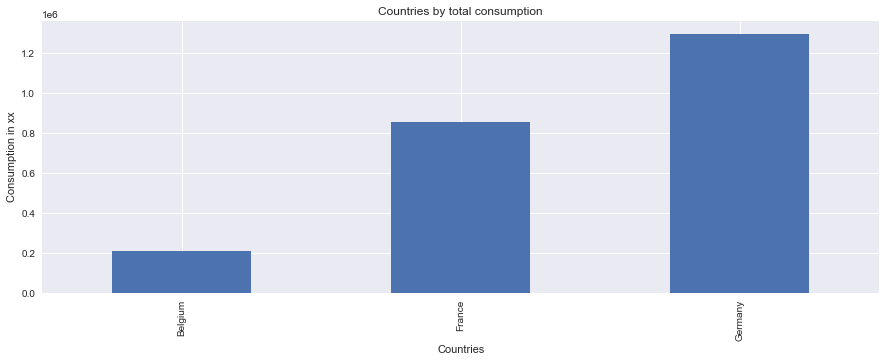

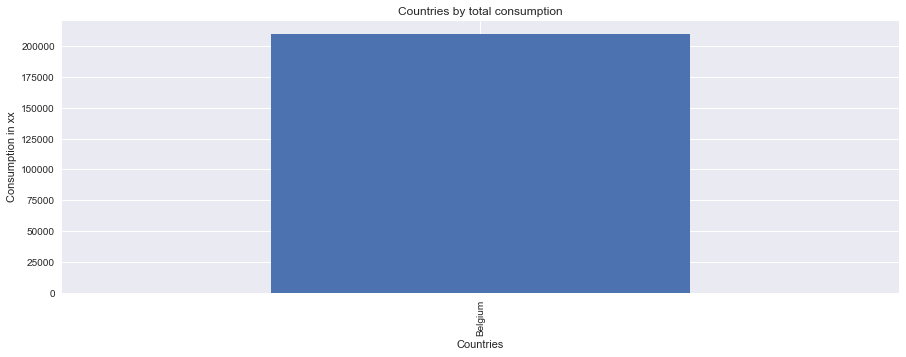

In [165]:
def method_4(countries: [str, list]):
    """This function receives a string with a country or a list of country strings. 
    It plots the total of the "_consumption" column of the specified countries. 
    Args:
        s (string): country string
    Returns:
        nothing, the function only plots the graph.
    """
    
    # Converting countries to a list of strings, if it is a str
    if isinstance(countries, str):
        countries = countries.split("delimiter")
    
    # Create the total consumption column and aggregate data by country
    df_aggregate = df.groupby(by = "country").sum().reset_index()
    all_columns = list(df_aggregate.columns)
    relevant_columns = list(filter(lambda x: '_consumption' in x, all_columns))
    df_aggregate['total_consumption'] = df_aggregate[relevant_columns].sum(axis = 1, skipna = True)
    
    # Select the countries to be plotted
    df_aggregate_selected = df_aggregate[df_aggregate["country"].isin(countries)]
    
    df_aggregate_selected.plot(x = "country", y = "total_consumption", kind = 'bar', figsize = (15,5), 
                           title = "Countries by total consumption", grid = True, xlabel = "Countries",
                           ylabel = "Consumption in xx", legend = False) # Add colering and seaborn style.
    
method_4(["Belgium", "France", "Germany"])
method_4("Belgium")

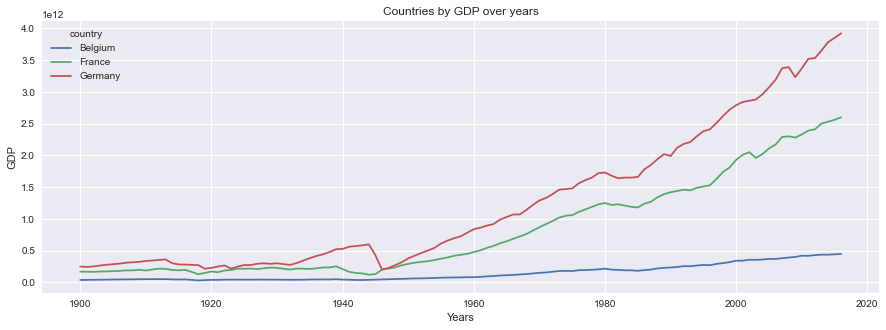

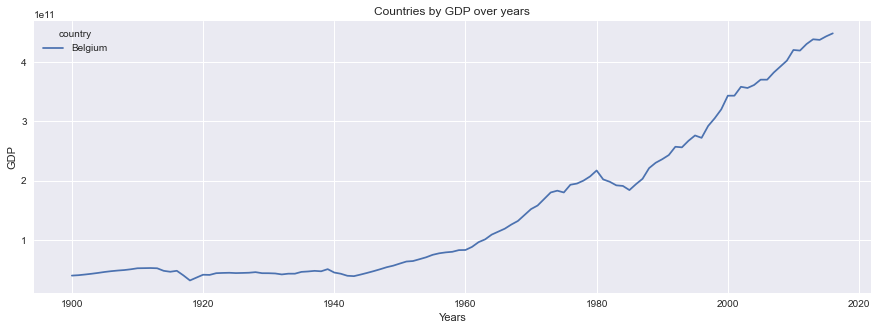

In [21]:
def method_5(countries: str):
    """This function receives a string with a country or a list of country strings. 
    It plots the "gdp" column of the specified countries over the years. 
    Args:
        s (string): country string
    Returns:
        nothing, the function only plots the graph.
    """
    
    import matplotlib
    matplotlib.style.use("seaborn")

    # Converting countries to a list of strings, if it is a str
    if isinstance(countries, str):
        countries = countries.split("delimiter")
    
    # Select the countries to be plotted
    df_gdp_selected = df[df["country"].isin(countries)]

    df_gdp_selected = df_gdp_selected[["country", "year", "gdp"]]
    df_gdp_selected = df_gdp_selected.pivot(index = "year", columns = "country", values = "gdp")

    
    # Plot the countries
    df_gdp_selected.plot(figsize = (15,5), title = "Countries by GDP over years", grid = True, 
                         xlabel = "Years", ylabel = "GDP", legend = True)

method_5(["Belgium", "France", "Germany"])
method_5("Belgium")